In [1]:
#Libraries, Read Out Dataset

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
dataset = pd.read_csv('Bahrain GP 2023.csv')
dataset.head(20)

,position,driver,driverid,constructor,constructorid,laps,time,points,grid
0,1.0,Max Verstappen,50.0,Red Bull,9.0,57,1:33:56.736,25,1
1,2.0,Sergio Pérez,81.5,Red Bull,9.0,57,11.987,18,2
2,3.0,Fernando Alonso,4.0,Aston Martin,11.7,57,38.637,15,5
3,4.0,Carlos Sainz,83.2,Ferrari,6.0,57,48.052,12,4
4,5.0,Lewis Hamilton,1.0,Mercedes,13.1,57,50.977,10,7
5,6.0,Lance Stroll,84.0,Aston Martin,11.7,57,54.502,8,8
6,7.0,George Russell,84.7,Mercedes,13.1,57,55.873,6,6
7,8.0,Valtteri Bottas,77.0,Alfa Romeo,51.0,57,+1:12.647,4,12
8,9.0,Pierre Gasly,84.2,Alpine F1 Team,21.4,57,+1:13.753,2,20
9,10.0,Alexander Albon,23.0,Williams,3.0,57,+1:29.774,1,15


In [2]:
# X = Drivers ID, y = Final Position, Z = Constructors ID, H = Grid

X = dataset.iloc[:-3, 2:-6].values
y = dataset.iloc[:-3, :-8].values
Z = dataset.iloc[:-3, 4:-4].values
H = dataset.iloc[:-3, 8:].values

In [3]:
# Machine Learning Regression Grid vs Final Position

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(H, y)

LinearRegression()

Text(0, 0.5, 'Position')

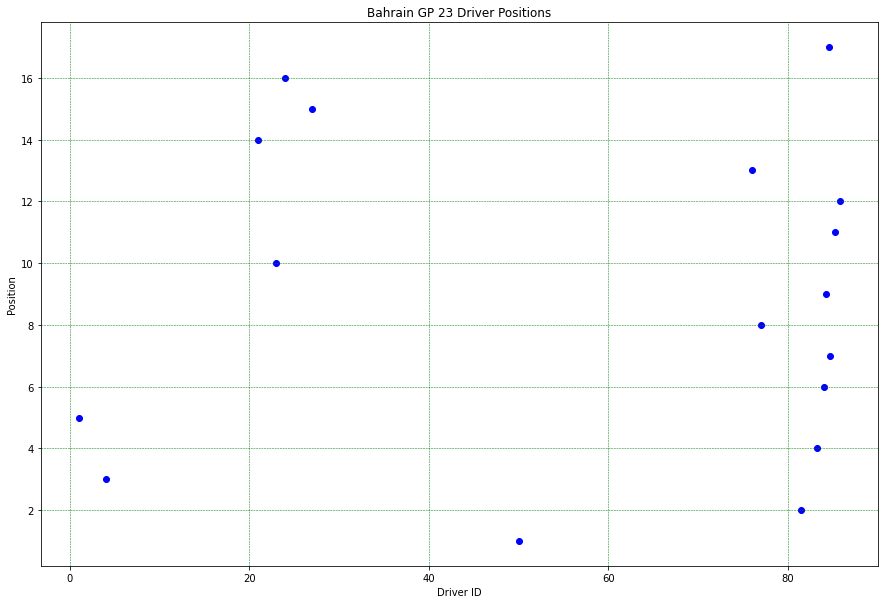

In [4]:
# Bahrain GP 23 Driver Position

plt.figure(figsize=(15,10))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.scatter(X, y, color = 'blue')
plt.title('Bahrain GP 23 Driver Positions')
plt.xlabel('Driver ID')
plt.ylabel('Position')

Text(0, 0.5, 'Position')

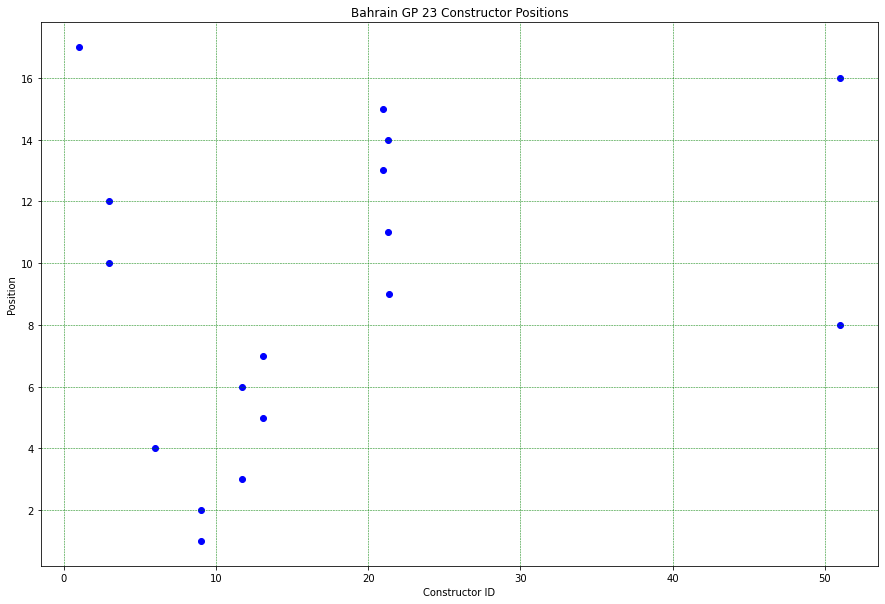

In [5]:
# Bahrain GP 23 Constructor Position

plt.figure(figsize=(15,10))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.scatter(Z, y, color = 'blue')
plt.title('Bahrain GP 23 Constructor Positions')
plt.xlabel('Constructor ID')
plt.ylabel('Position')

Text(0, 0.5, 'Drivers')

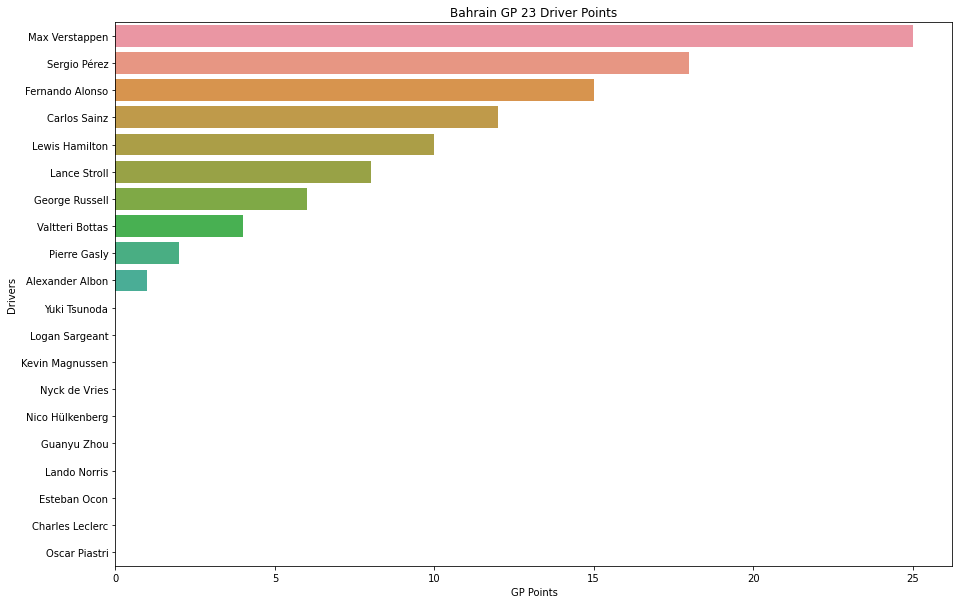

In [6]:
# Bahrain GP 23 Driver Points

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='points', y='driver', data=dataset)
plt.title('Bahrain GP 23 Driver Points')
plt.xlabel('GP Points')
plt.ylabel('Drivers')

Text(0, 0.5, 'Constructors')

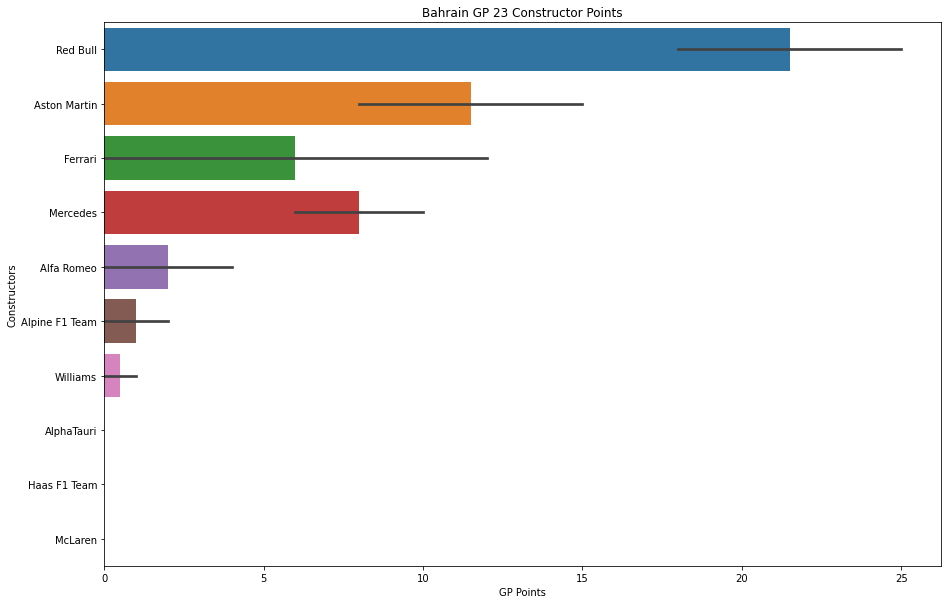

In [7]:
# Bahrain GP 23 Constructor Points

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='points', y='constructor', data=dataset)
plt.title('Bahrain GP 23 Constructor Points')
plt.xlabel('GP Points')
plt.ylabel('Constructors')

Text(0, 0.5, 'Finish Position')

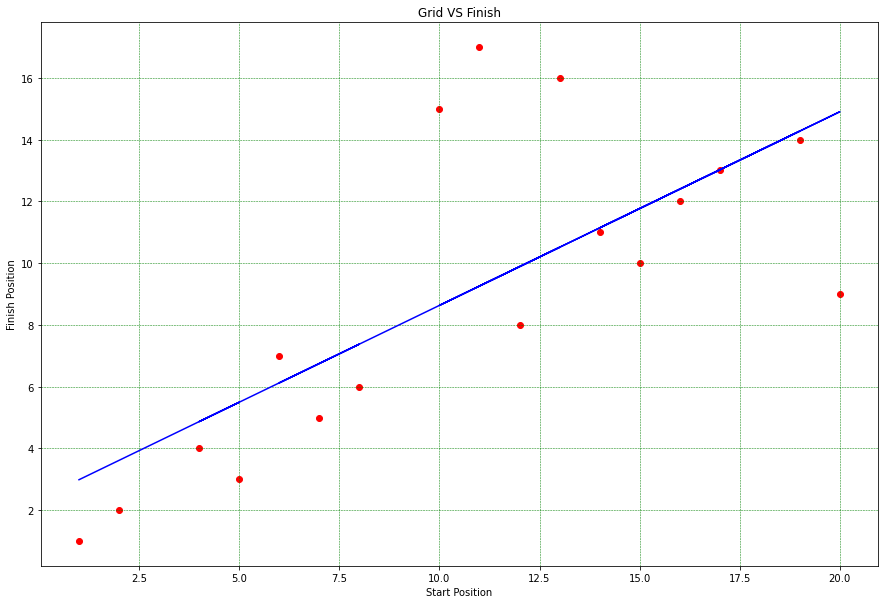

In [8]:
# Bahrain GP 23 Grid VS Finish Points

plt.figure(figsize=(15,10))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.scatter(H, y, color = 'red')
plt.plot(H, regressor.predict(H), color = 'blue')
plt.title('Grid VS Finish')
plt.xlabel('Start Position')
plt.ylabel('Finish Position')